#### Importing the libraries

## Assignment 6
    1. Name: Amar Dalvi
    2. Batch: P-10
    3. Roll No.: 43218
    
   ### Problem Statement :
     Object detection using Transfer Learning of CNN architectures

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

#### Preprocessing for dataset

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)

In [3]:
root_dir = '101_ObjectCategories'
train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

FileNotFoundError: ignored

In [ ]:
imgs, labels = next(iter(train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

#### a. Load in a pretrained model (InceptionV3)

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [ ]:
base_model.trainable = False

####  c. Add custom classifier with several layers of trainable parameters to model

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 102)               835686    
                                                                 
Total params: 22,638,470
Trainable params: 835,686
Non-trainable params: 21,802,784
_________________________________________________________________


#### d. Train classifier layers on training data available for task

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.fit(train, validation_data=valid, steps_per_epoch=20, epochs=50) #20,50

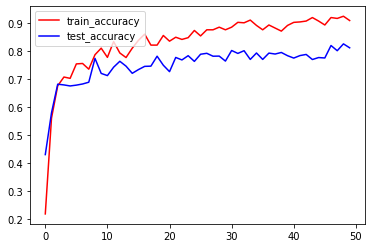

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [ ]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50) #20,50

Epoch 1/50
20/20 [==============================] - 474s 24s/step - loss: 3.9578 - categorical_accuracy: 0.4359 - val_loss: 126.2205 - val_categorical_accuracy: 0.0163
Epoch 2/50
20/20 [==============================] - 466s 24s/step - loss: 3.9319 - categorical_accuracy: 0.2875 - val_loss: 13552.6338 - val_categorical_accuracy: 0.0481
Epoch 3/50
20/20 [==============================] - 462s 24s/step - loss: 3.5396 - categorical_accuracy: 0.3250 - val_loss: 65.9670 - val_categorical_accuracy: 0.0663
Epoch 4/50
20/20 [==============================] - 461s 24s/step - loss: 3.1368 - categorical_accuracy: 0.3812 - val_loss: 62.4981 - val_categorical_accuracy: 0.0722
Epoch 5/50
20/20 [==============================] - 463s 24s/step - loss: 2.8024 - categorical_accuracy: 0.4109 - val_loss: 4.9331 - val_categorical_accuracy: 0.2341
Epoch 6/50
20/20 [==============================] - 457s 23s/step - loss: 2.5176 - categorical_accuracy: 0.4328 - val_loss: 4.8107 - val_categorical_accuracy: 0.2